# Agglomerative Hierarchical Clustering (AHC)
### Dataset : [A3-data.txt](../../input/A3-data.txt)

<a id="1"></a>
## Import modules

In [7]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

<a id="2"></a>
## Loading dataset

In [8]:
filename = '../../input/A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

features = ['x', 'y', 'z', 't']
target = ['class']

X = df.loc[:, features].values

            x         y         z         t  class
0   -0.031676 -9.912054 -0.579436 -1.044239      1
1    0.002526  6.172456  3.288339 -1.006427      5
2    0.183123 -0.387841  6.236470 -1.691491      2
3   -0.042262 -1.996272 -1.655302 -2.995311      1
4   -0.062811 -0.417072  6.657475 -3.633134      4
..        ...       ...       ...       ...    ...
355 -0.340733  8.504536  7.903644 -2.032197      6
356 -0.024928  1.551977  6.361992 -0.757714      2
357 -0.668529 -0.607597  0.639295  4.329213      6
358 -0.122711 -5.516957 -2.111173  2.209675      3
359  0.740207 -7.492176  1.959426 -7.119918      6

[360 rows x 5 columns]


<a id="3"></a>
## Plot function

In [9]:
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    print("Last 10 merge distances:", linkage_matrix[-10:, 2])


    dendrogram(linkage_matrix, **kwargs)

<a id="4"></a>
## Agglomerative Clustering
The **AgglomerativeClustering** object conducts hierarchical clustering using a bottom-up method: initially, every observation is in its own separate cluster, and as the process progresses, these clusters are progressively combined.

<a id="5"></a>
### AHC - Unweighted average (UPGMA) linkage

Last 10 merge distances: [ 8.03374404  8.37341731  8.60468979  8.83481187  9.77409364 10.10042844
 10.31442829 11.27313979 13.17010815 15.91059921]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


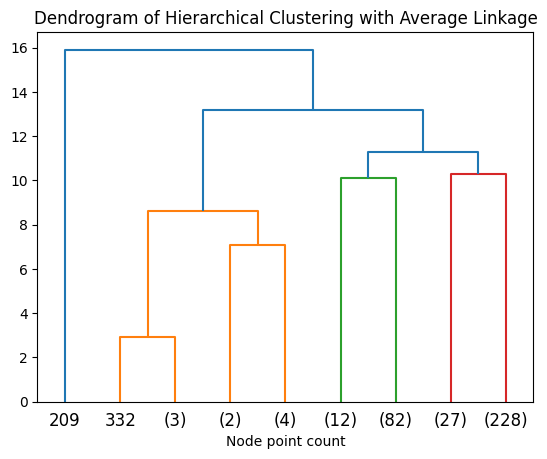

In [10]:

model = AgglomerativeClustering(affinity='euclidean', linkage='average', distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Dendrogram of Hierarchical Clustering with Average Linkage")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Node point count")




plt.show()

<a id="6"></a>
### AHC - Complete linkage (CL) 

Last 10 merge distances: [13.15269638 13.40467957 14.42919079 16.19432518 16.99286412 17.5141009
 17.70987841 19.29316909 22.21654963 27.30848051]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


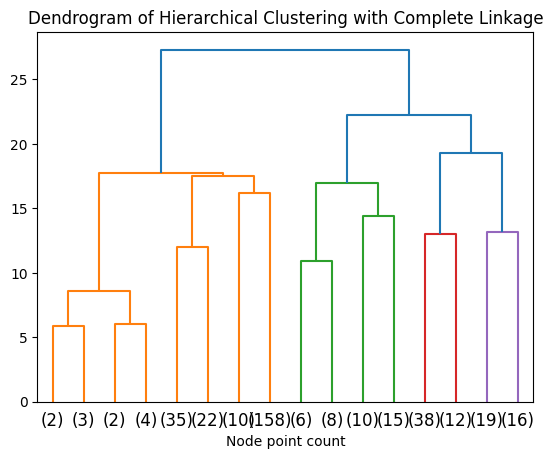

In [11]:
model = AgglomerativeClustering(affinity='euclidean', linkage='complete', distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Dendrogram of Hierarchical Clustering with Complete Linkage")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Node point count")
plt.show()